# US9 - Custos do Consumo de Água

## 1. Introdução

$\textbf{Nesta User Story (US09)}$ foi-nos pedido a realização de uma análise estatística relativa aos custos de consumo de água em todos os parques. Recebemos um arquivo denominado $\textit{water_consumption.csv}$ que fornece os dados necessários para a realização do estudo. 
Este arquivo regista o consumo diário de água (em $m^3$) desde o dia de abertura de cada parque. O valor pago pela água é de $0.7\,€/m^3$ até um consumo de $1000\,m^3/mês$, com uma taxa de $15\%$ para consumos superiores.




## 2. Código e Resultados

In [53]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy import stats

### Consumo Mensal de Água

In [54]:
# leitura do ficheiro com o consumo de água
data = pd.read_csv('water_consumption.csv', sep=';', skiprows = 1, names=['Park', 'Year', 'Month', 'Day', 'Consumption'])

data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Consumption'] = data['Consumption'].astype(str).str.replace(',', '.').astype(float)

### Barplot

Digite o ano para o qual pretende o estudo: 2023
Digite o mês no qual pretende começar o estudo: 1
Digite o mês no qual pretende terminar o estudo: 12
Digite a identificação do parque para o qual pretende o estudo: Oriental


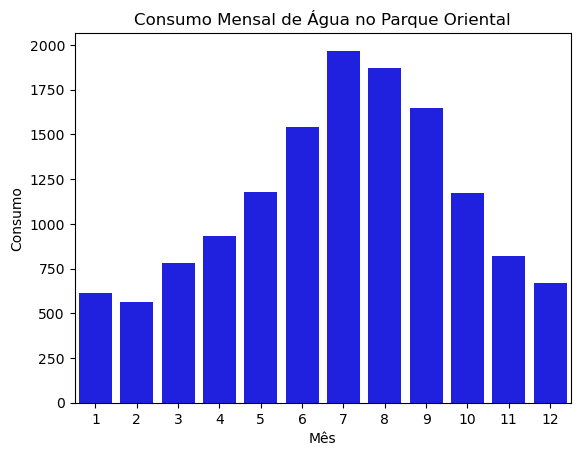

In [4]:
ano = int(input('Digite o ano para o qual pretende o estudo: '))
mesInicio = int(input('Digite o mês no qual pretende começar o estudo: '))
mesFim = int(input('Digite o mês no qual pretende terminar o estudo: '))
identificacao_parque = (input('Digite a identificação do parque para o qual pretende o estudo: '))

dados_filtrados = data[(data['Year'] == ano) & 
                       (data['Month'] >= mesInicio) & 
                       (data['Month'] <= mesFim) & 
                       (data['Park'] == identificacao_parque)]

consumo_mensal = dados_filtrados.groupby('Month')['Consumption'].sum().reset_index()

sns.barplot(x='Month', y='Consumption', data=consumo_mensal, color='blue')
plt.title(f'Consumo Mensal de Água no Parque {identificacao_parque}')
plt.xlabel('Mês')
plt.ylabel('Consumo')
plt.show()

### Média dos Custos Mensais do Consumo de Água

In [ ]:
numero_parques = int(input('Digite o número de parques para os quais pretende a média mensal do consumo de água: '))

taxa_base = 0.7  # Taxa base por metro cúbico
limite_superior = 1000 # Limite de consumo para aplicar a taxa base

consumo_mensal = list()
custo_por_mes = list()
for i in range(numero_parques):
    identificacao_parque = input('Digite a identificação do parque para o qual pretende o estudo: ')
    
    for j in range(1, 13):
        dados_filtrados = data[(data['Park'] == identificacao_parque) & (data['Month'] == j)]
        consumo_total = dados_filtrados['Consumption'].sum()
        consumo_mensal.append(consumo_total)
    for k, valor in enumerate(consumo_mensal):
        if valor <= 1000:
            custo_por_mes.append(valor * taxa_base)
        else:
            custo_por_mes.append(valor * (taxa_base + (0.15 * taxa_base)))
            
    media_custo_mensal = st.mean(custo_por_mes)

    print(f'\nA Média de Custo Mensal de Consumo de Água no Parque {identificacao_parque} é de {media_custo_mensal:.2f}€\n')

### Comparar o menor e maior  parque em termos de consumo

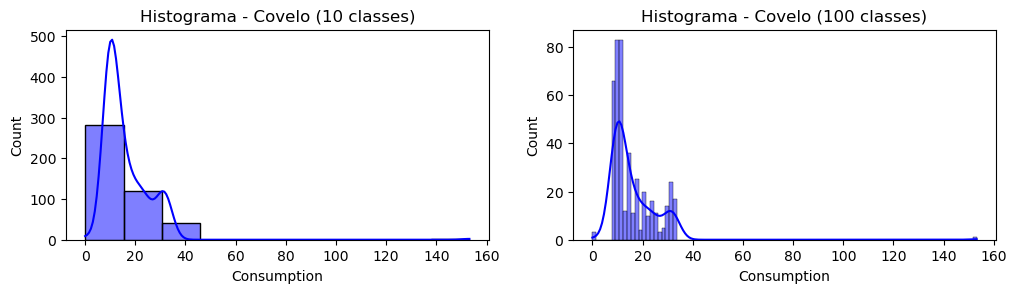

Parque com menor consumo de água (Covelo):
Média: 16.05
Mediana: 11.90
Desvio Padrão: 10.15
Coeficiente de Skewness: 5.94

Tabela de Frequência:
         Intervalo  Frequência Absoluta  Frequência Relativa
0     0.00 - 30.64                  402             0.905405
1    30.64 - 61.27                   41             0.092342
2    61.27 - 91.91                    0             0.000000
3   91.91 - 122.54                    0             0.000000
4  122.54 - 153.18                    1             0.002252

Outliers: [153.1785938]



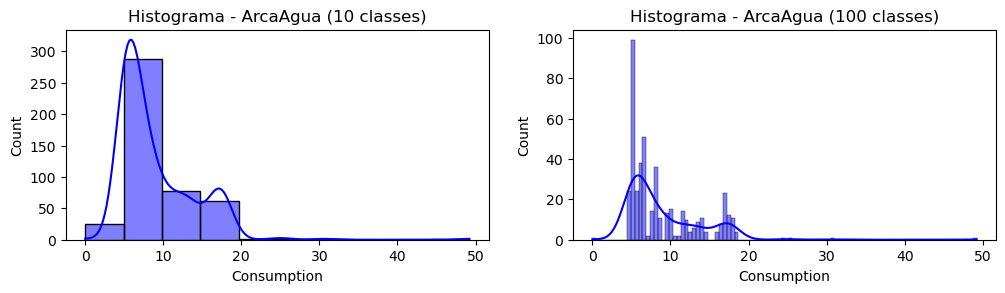

Parque com menor consumo de água (ArcaAgua):
Média: 9.00
Mediana: 6.77
Desvio Padrão: 4.85
Coeficiente de Skewness: 2.16

Tabela de Frequência:
       Intervalo  Frequência Absoluta  Frequência Relativa
0    0.00 - 9.84                  313             0.686404
1   9.84 - 19.69                  139             0.304825
2  19.69 - 29.53                    2             0.004386
3  29.53 - 39.38                    1             0.002193
4  39.38 - 49.22                    1             0.002193

Outliers: [30.555, 49.21875, 25.35275925, 24.5]



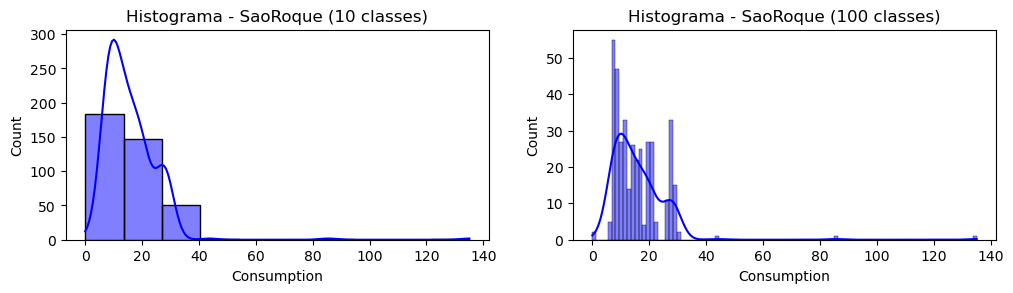

Parque com menor consumo de água (SaoRoque):
Média: 15.77
Mediana: 13.94
Desvio Padrão: 10.08
Coeficiente de Skewness: 5.36

Tabela de Frequência:
         Intervalo  Frequência Absoluta  Frequência Relativa
0     0.00 - 27.02                  330             0.861619
1    27.02 - 54.04                   51             0.133159
2    54.04 - 81.06                    0             0.000000
3   81.06 - 108.08                    1             0.002611
4  108.08 - 135.10                    1             0.002611

Outliers: [135.1035197, 85.46364227, 43.659]



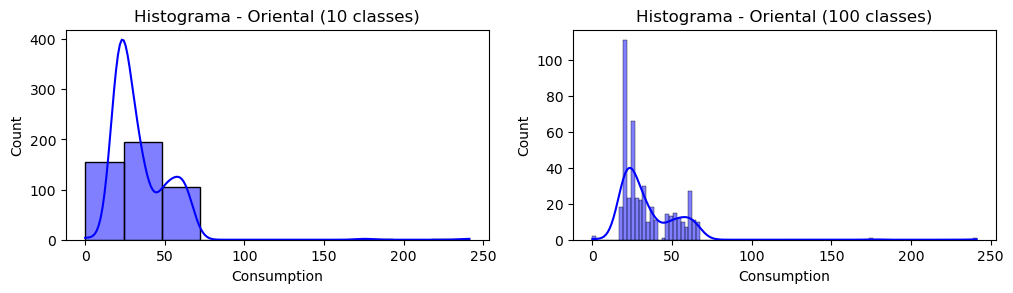

Parque com menor consumo de água (Oriental):
Média: 34.57
Mediana: 27.57
Desvio Padrão: 19.00
Coeficiente de Skewness: 4.05

Tabela de Frequência:
         Intervalo  Frequência Absoluta  Frequência Relativa
0     0.00 - 48.26                  349             0.765351
1    48.26 - 96.53                  105             0.230263
2   96.53 - 144.79                    0             0.000000
3  144.79 - 193.05                    1             0.002193
4  193.05 - 241.32                    1             0.002193

Outliers: [241.3152, 175.6774656]



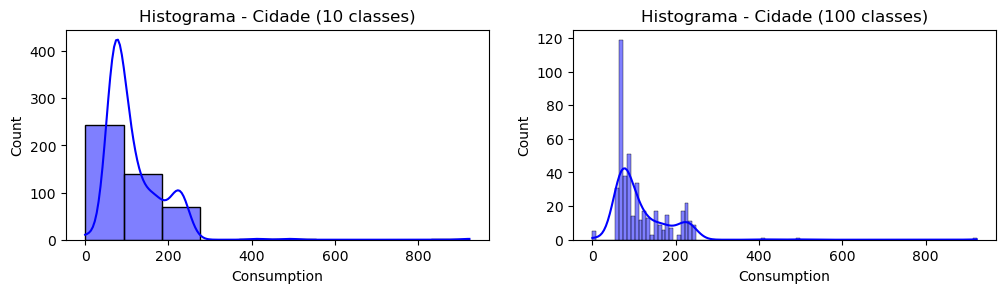

Parque com menor consumo de água (Cidade):
Média: 116.24
Mediana: 86.00
Desvio Padrão: 71.65
Coeficiente de Skewness: 3.99

Tabela de Frequência:
         Intervalo  Frequência Absoluta  Frequência Relativa
0    0.00 - 184.53                  384             0.842105
1  184.53 - 369.06                   69             0.151316
2  369.06 - 553.59                    2             0.004386
3  553.59 - 738.12                    0             0.000000
4  738.12 - 922.65                    1             0.002193

Outliers: [491.4, 922.6546875, 413.595]



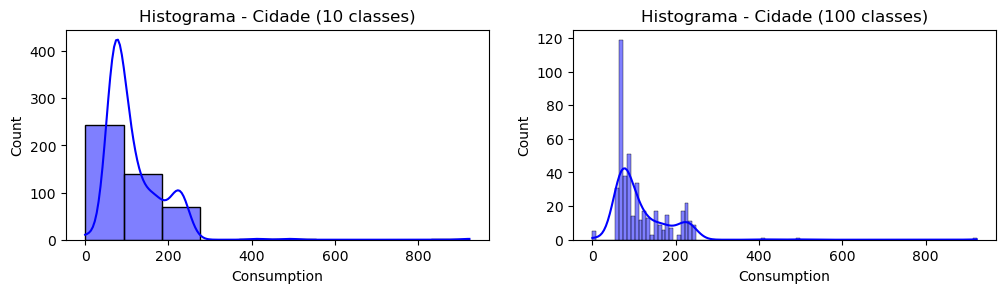

Parque com maior consumo de água (Cidade):
Média: 116.24
Mediana: 86.00
Desvio Padrão: 71.65
Coeficiente de Skewness: 3.99

Tabela de Frequência:
         Intervalo  Frequência Absoluta  Frequência Relativa
0    0.00 - 184.53                  384             0.842105
1  184.53 - 369.06                   69             0.151316
2  369.06 - 553.59                    2             0.004386
3  553.59 - 738.12                    0             0.000000
4  738.12 - 922.65                    1             0.002193

Outliers: [491.4, 922.6546875, 413.595]



In [55]:
# Encontrar o menor e o maior consumo geral
consumo_min = data['Consumption'].min()
consumo_max = data['Consumption'].max()

# Determinar os parques correspondentes aos valores mínimo e máximo
parques_consumo_min = data.loc[data['Consumption'] == consumo_min, 'Park'].tolist()
parques_consumo_max = data.loc[data['Consumption'] == consumo_max, 'Park'].tolist()

# Calcular os indicadores estatísticos
def calcular_indicadores(dados):
    media = np.mean(dados)
    mediana = np.median(dados)
    desvio_padrao = np.std(dados)
    coeficiente_skewness = stats.skew(dados)
    return [media, mediana, desvio_padrao, coeficiente_skewness]

# Função para construir tabelas de frequência
def construir_tabela_frequencia(dados, classes=5):
    frequencia_absoluta, intervalos = np.histogram(dados, bins=classes)
    frequencia_relativa = frequencia_absoluta / len(dados)
    tabela_frequencia = pd.DataFrame({
        'Intervalo': [f'{intervalos[i]:.2f} - {intervalos[i+1]:.2f}' for i in range(len(intervalos) - 1)],
        'Frequência Absoluta': frequencia_absoluta,
        'Frequência Relativa': frequencia_relativa
    })
    return tabela_frequencia

# Verificar outliers
def verificar_outliers(dados):
    quartis = np.percentile(dados, [25, 50, 75])
    iqr = quartis[2] - quartis[0]
    limite_inferior = quartis[0] - 1.5 * iqr
    limite_superior = quartis[2] + 1.5 * iqr
    outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]
    return outliers

# Parques com o menor consumo
for parque in set(parques_consumo_min):  # Usando set() para evitar duplicatas
    # Recolha dos dados do parque
    dados_parque_menor = data.loc[data['Park'] == parque, 'Consumption'].dropna()
    
    # Calcular indicadores estatísticos
    indicadores_parque_menor = calcular_indicadores(dados_parque_menor)

    # Construir tabela de frequência
    tabela_frequencia_parque_menor = construir_tabela_frequencia(dados_parque_menor)

    # Verificar os outliers
    outliers_parque_menor = verificar_outliers(dados_parque_menor)

    # Histogramas com 10 e 100 classes
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(dados_parque_menor, bins=10, kde=True, color='blue')
    plt.title(f'Histograma - {parque} (10 classes)')
    plt.subplot(2, 2, 2)
    sns.histplot(dados_parque_menor, bins=100, kde=True, color='blue')
    plt.title(f'Histograma - {parque} (100 classes)')
    plt.show()

    # Output dos resultados
    print(f'Parque com menor consumo de água ({parque}):')
    print(f'Média: {indicadores_parque_menor[0]:.2f}')
    print(f'Mediana: {indicadores_parque_menor[1]:.2f}')
    print(f'Desvio Padrão: {indicadores_parque_menor[2]:.2f}')
    print(f'Coeficiente de Skewness: {indicadores_parque_menor[3]:.2f}\n')
    print('Tabela de Frequência:')
    print(tabela_frequencia_parque_menor)
    print(f'\nOutliers: {outliers_parque_menor.tolist()}\n')

# Parques com o maior consumo
for parque in set(parques_consumo_max):  # Usando set() para evitar duplicatas
    # Recolha dos dados do parque
    dados_parque_maior = data.loc[data['Park'] == parque, 'Consumption'].dropna()
    
    # Calcular indicadores estatísticos
    indicadores_parque_maior = calcular_indicadores(dados_parque_maior)

    # Construir tabela de frequência
    tabela_frequencia_parque_maior = construir_tabela_frequencia(dados_parque_maior)

    # Verificar os outliers
    outliers_parque_maior = verificar_outliers(dados_parque_maior)

    # Histogramas com 10 e 100 classes
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(dados_parque_maior, bins=10, kde=True, color='blue')
    plt.title(f'Histograma - {parque} (10 classes)')
    plt.subplot(2, 2, 2)
    sns.histplot(dados_parque_maior, bins=100, kde=True, color='blue')
    plt.title(f'Histograma - {parque} (100 classes)')
    plt.show()

    # Output dos resultados
    print(f'Parque com maior consumo de água ({parque}):')
    print(f'Média: {indicadores_parque_maior[0]:.2f}')
    print(f'Mediana: {indicadores_parque_maior[1]:.2f}')
    print(f'Desvio Padrão: {indicadores_parque_maior[2]:.2f}')
    print(f'Coeficiente de Skewness: {indicadores_parque_maior[3]:.2f}\n')
    print('Tabela de Frequência:')
    print(tabela_frequencia_parque_maior)
    print(f'\nOutliers: {outliers_parque_maior.tolist()}\n')

## 3. Análise e Interpretação dos Resultados

Na representação gráfica do $\textbf{custo mensal da água}$, podemos observar que o consumo mensal é mais elevado durante os meses de verão, quando há maior seca. Por outro lado, o consumo é relativamente menor durante os períodos mais húmidos, como na primavera, outono e inverno.

Para a criação do gráfico usamos, o Barplot que representa o consumo mensal de água, em função
das seguintes especificações dadas pelo utilizador: ano, período de tempo
(MêsInicial, MêsFinal) e identificação do parque.

No cálculo da $\textbf{média dos custos mensais do consumo de água}$, utilizando a fórmula $\frac{1}{n}\times\sum_{i\ =\ 1}^{n}x_i$, que representa a média aritmética de dados não classificados, e é representada em Python pela função $\textit{st.mean}$ do módulo $\textit{statistics}$, podemos obter a média dos custos mensais dos parques, considerando uma taxa base de 0.7.

Para obter esse valor, primeiro solicitamos ao usuário qual o parque que deseja estudar. Em seguida, criamos listas para armazenar o consumo total em cada mês (necessário para calcular a taxa) e o custo em cada mês (necessário para calcular a média dos custos mensais), permitindo-nos assim calcular a média mensal do valor a pagar.

Após reunir os valores necessários para calcular o custo mensal, determinamos o preço a pagar multiplicando o valor do consumo pela taxa, resultando no montante a pagar. É importante notar que, dependendo se o consumo ultrapassar ou não os $1000 m^{3}$, o valor a pagar pode aumentar em até $15\%$ para consumos superiores a esse limiar.

Uma vez calculada a média de cada mês, obtemos a média total durante o ano do custo mensal, usando a mesma fórmula mencionada em cima.